# Breast Cancer Wisconsin (Original) Data Set
(https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

## Data Read and Exploration

In [2]:
br_can_df = pd.read_csv('../data/breastCancer.csv')
print(f'Dataset has {br_can_df.shape[0]} rows and {br_can_df.shape[1]} columns. First few Columns are: \n')
br_can_df.head()

Dataset has 699 rows and 11 columns. First few Columns are: 



,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Columns
list(br_can_df.columns)

['id',
 'clump_thickness',
 'size_uniformity',
 'shape_uniformity',
 'marginal_adhesion',
 'epithelial_size',
 'bare_nucleoli',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class']

In [4]:
# Information on Columns
br_can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Observations:
* Dataset has 699 records.
* No Null values.
* All columns except bare nucleoli are integer.
* Overall 10 integer column and 1 object column.
* Id columns must be record identifier and can be removed due to high cardnality.
* Class column identifies if the breast cancer is bening or malignant.

In [5]:
# checking distribution of the target variables
br_can_df['class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: class, dtype: float64

### Observation : 65% of the records are benign cancer and 35% are malignant.

In [6]:
# Describing th data
br_can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Observation: Except id and class, all columns have values between 1 to 10.


In [7]:
# Exploring the only object column that shows numerical value
br_can_df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

### Observation : 
There are 16 records containing "?". These may be intentional or fat fingered, we dont know. Only clue we have is the values in column is between 1 to 10. Given the lack of further information on that column, following are the possible course of action
* Delete the rows ( This will reduce the record count.Last Option)
* Impute Value with Mean, Median, Mode (This is a possibility)
* Assign a new number (Out of question since value should be between 1-10).
* Assign it to the major category 1 (Easiest and most logical of all). We will choose this option

In [8]:
# Replace ? with 0
br_can_df=br_can_df.replace(to_replace="?",value=1)
br_can_df['bare_nucleoli'] = br_can_df['bare_nucleoli'].astype('int64')

In [9]:
# Replace the Benign(2) and Malignant(4) with 0 & 1 respectively
br_can_df['class'] = br_can_df['class'].map({2:0, 4:1})
br_can_df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

In [10]:
br_can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [11]:
# Describing th data again after above changes
br_can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


## Exploratory Data Analysis - Univariate

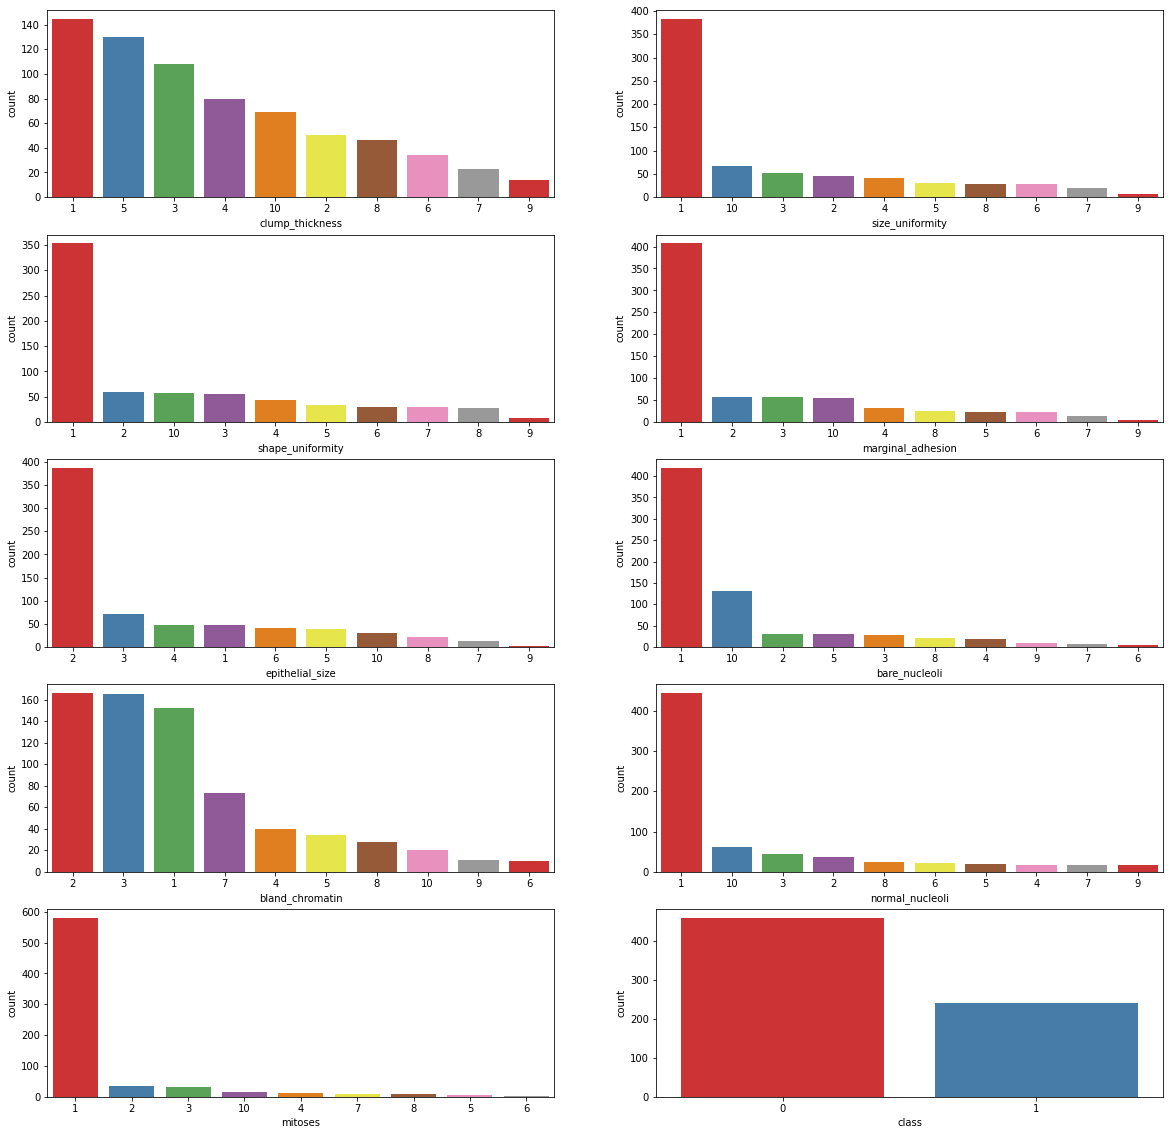

In [12]:
columns_list = list(br_can_df.columns)
columns_list.remove('id')
rows = 5 ; columns = 2
cat_cols_np_arr = np.array(columns_list).reshape(5, 2)

f, axes = plt.subplots(rows, columns, figsize=(20, 20))
for row in range(rows):
    for column in range(columns):
        sns.countplot(data = br_can_df,
                      x = cat_cols_np_arr[row][column], 
                      order = br_can_df[cat_cols_np_arr[row][column]].value_counts().index,
                      palette = "Set1", 
                      ax = axes[row, column])

## Exploratory Data Analysis - Bi-Variate

In [13]:
columns_list = list(br_can_df.columns)
columns_list.remove('id')
columns_list.remove('class')
columns_list

['clump_thickness',
 'size_uniformity',
 'shape_uniformity',
 'marginal_adhesion',
 'epithelial_size',
 'bare_nucleoli',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

<Figure size 1440x1440 with 0 Axes>

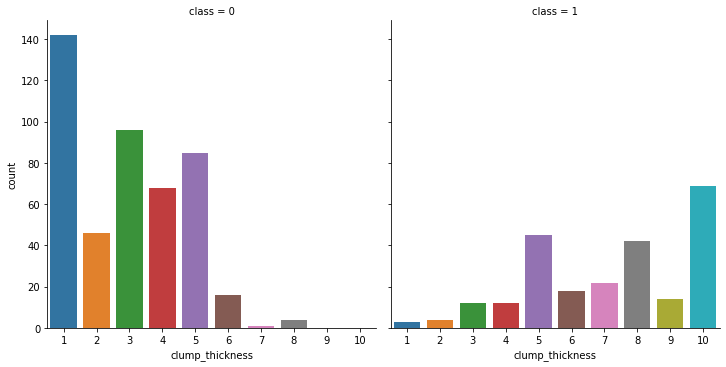

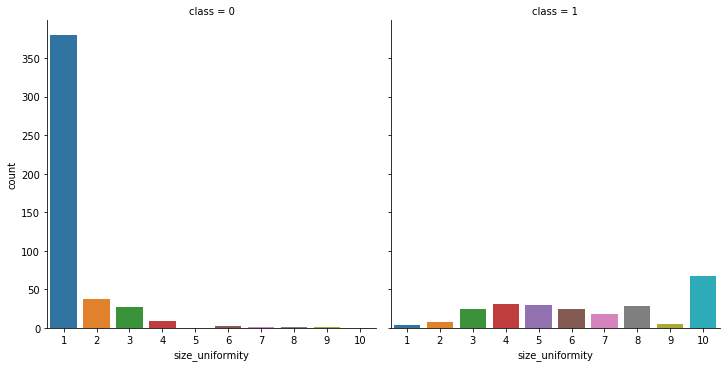

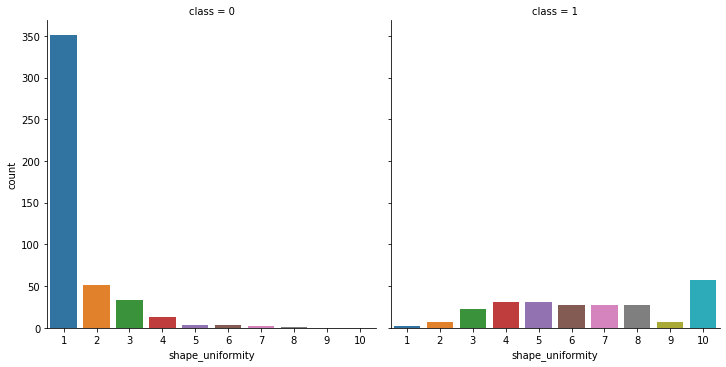

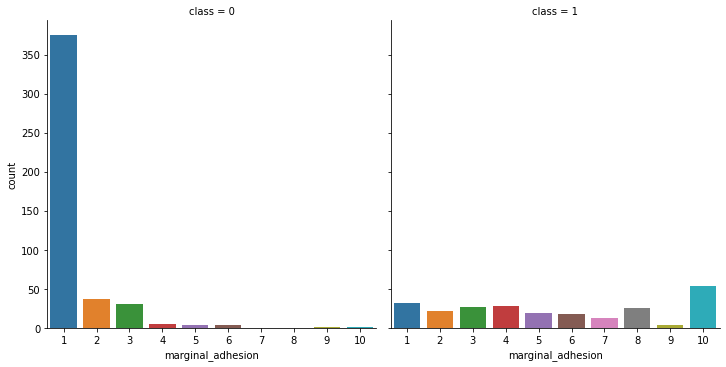

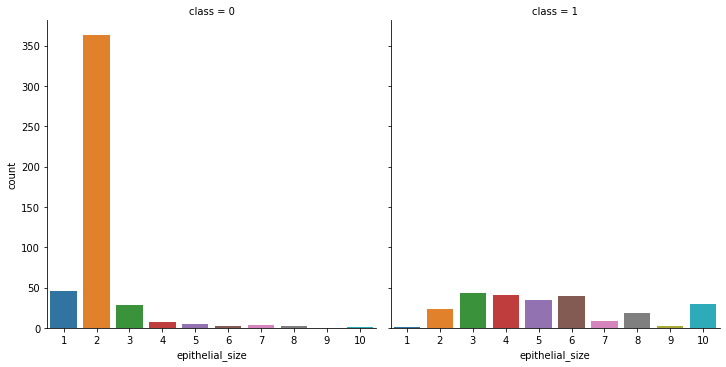

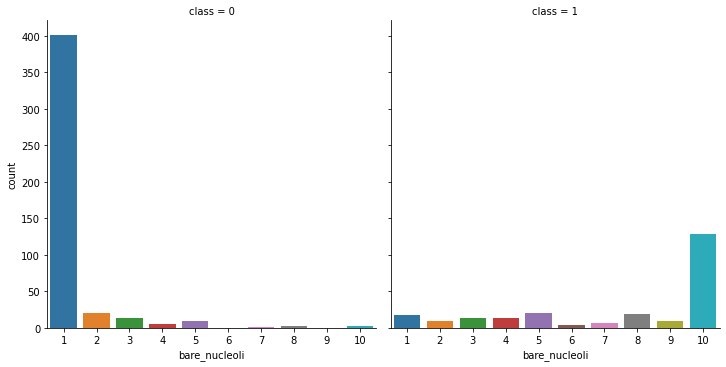

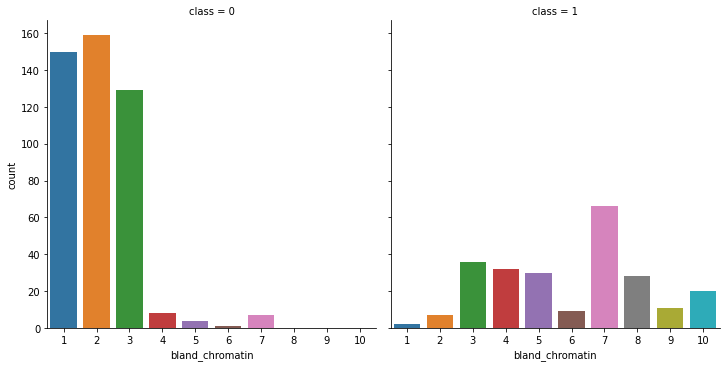

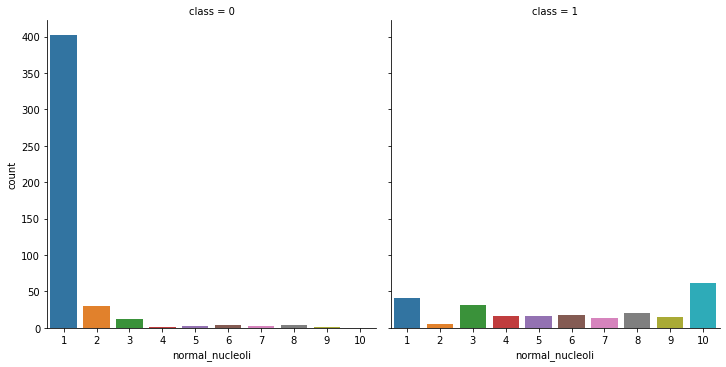

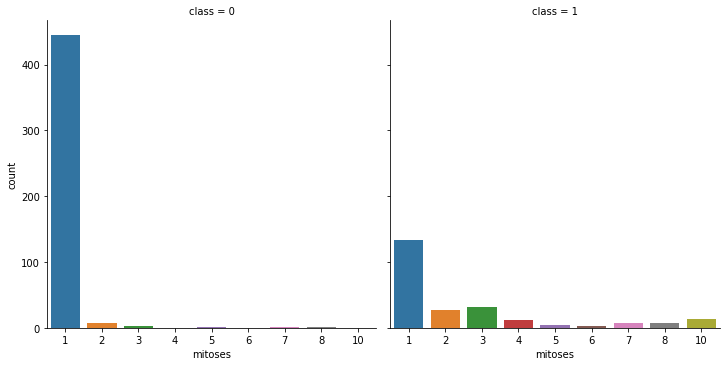

In [14]:
plt.figure(figsize=(20, 20))
for column in columns_list:
    # for column in range(columns):
    sns.catplot(data = br_can_df,
                x = column, 
                col = 'class',
                kind='count')

## Exploratory Data Analysis - Multi-Variate

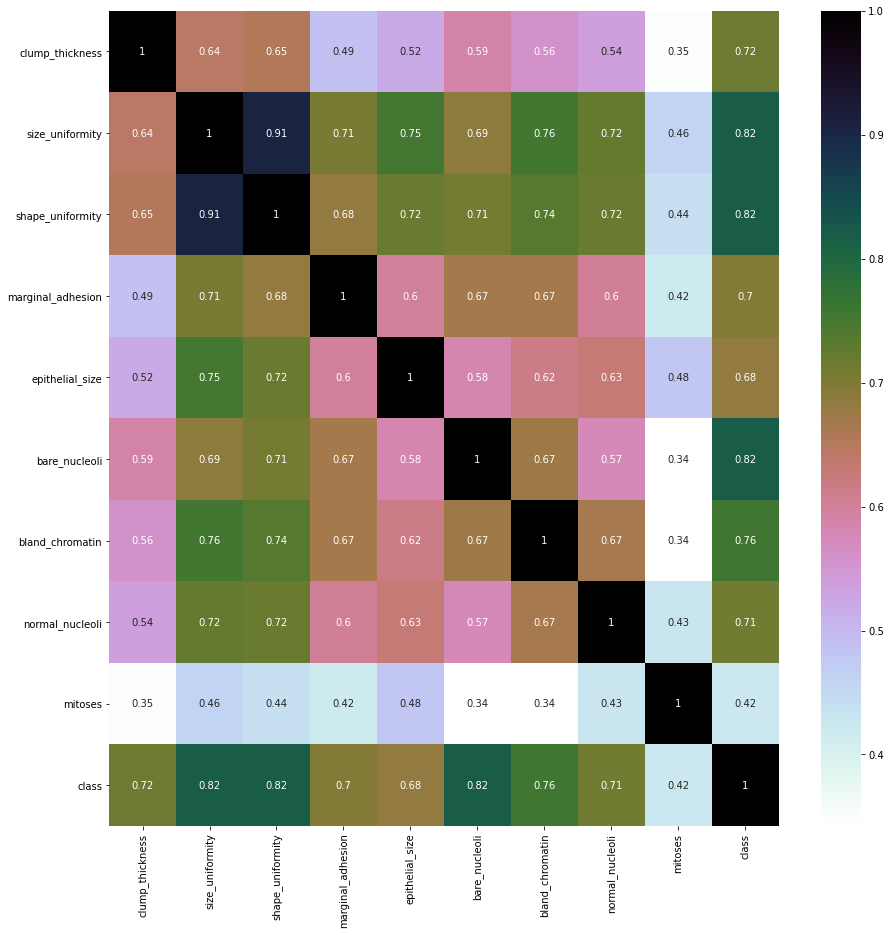

In [15]:
plt.figure(figsize=(15,15)) 
sns.heatmap(br_can_df.drop(columns=['id']).corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Modelling

In [18]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_true, y_pred):
    '''
    Function for Precision, Recall and F1 Score
    # Note : By Default Precision, Recall & F1 score of 1 is shown in the metrics
    '''
    accuracy       = accuracy_score(y_test, y_pred)
    precision      = precision_score(y_test, y_pred)
    recall         = recall_score(y_test, y_pred)
    F1_score       = f1_score(y_test, y_pred)
    roc_auc_scr    = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_mat       = np.array(np.array([[tn, fn], [fp, tp]]))
    class_report   = classification_report(y_true, y_pred, output_dict=True)
    
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, class_report;

In [19]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    rows = int(class_perf_df.shape[0])

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return;

In [25]:
# Build Classification Model
def build_class_model(X_train, X_test, y_train, y_test, classifier_model):
    '''
    Functio to Build Classification Model
    '''
    classifier_performance = []
    learning_curve_dtl = []
    classification_report = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    
        
        # Cross Validation Score on training test
        scores = cross_val_score(
                                 classifier, 
                                 X_train,
                                 y_train, 
                                 scoring=make_scorer(f1_score, average='weighted', labels=[1]),
                                 cv=5
                                )
        cv_score_mean = scores.mean()
        
        # Learning Curve of Training/Cross Validation
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
                                                                                classifier, 
                                                                                X_train, 
                                                                                y_train, 
                                                                                cv=5, 
                                                                                scoring=make_scorer(f1_score, average='weighted', labels=[1]),
                                                                                return_times=True
                                                                            )
        
        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, class_report = calc_classfier_metric(classifier, y_test, y_pred)
        
        # Build Dataframes
        classifier_performance.append([classifier.__class__.__name__, cv_score_mean, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr])
        learning_curve_dtl.append([classifier.__class__.__name__, train_sizes, train_scores, test_scores, fit_times])
        classification_report.append([classifier.__class__.__name__, class_report])
        
        class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Training_CV_Score', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr']).sort_values('F1_Score', ascending = False)
        learning_curve_df = pd.DataFrame(learning_curve_dtl, columns=['Classifier', 'train_sizes', 'train_scores', 'test_scores', 'fit_times'])
        class_report_df = pd.DataFrame(classification_report, columns=['Classifier', 'Report'])
        
    return class_perf_df, learning_curve_df, class_report_df;

In [30]:
def create_learning_curve(learning_curve_df):
    
    ''' Function to get training and cross validation '''
    
    plt.figure(figsize=(15, 50))
    rows = learning_curve_df.shape[0]
    
    for i in range(learning_curve_df.shape[0]):
        plt.subplot(rows, 3, i+1)
        plt.title(learning_curve_df['Classifier'].iloc[i])
    
        # Calculate training and test mean and std
        #
        train_mean = np.mean(learning_curve_df['train_scores'].iloc[i], axis=1)
        train_std  = np.std(learning_curve_df['train_scores'].iloc[i], axis=1)
        test_mean  = np.mean(learning_curve_df['test_scores'].iloc[i], axis=1)
        test_std   = np.std(learning_curve_df['test_scores'].iloc[i], axis=1)

        # Plot the learning curve
        #
        plt.plot(learning_curve_df['train_sizes'].iloc[i], train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
        plt.fill_between(learning_curve_df['train_sizes'].iloc[i], train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
        
        plt.plot(learning_curve_df['train_sizes'].iloc[i], test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
        plt.fill_between(learning_curve_df['train_sizes'].iloc[i], test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
        
        plt.xlabel('Training Data Size')
        plt.ylabel('Weighted F1 Score')
        plt.grid()
        plt.legend(loc='lower right')

In [31]:
# Create Test Train Split
X = br_can_df.drop(columns=['id', 'class'])
y = br_can_df['class']

# #Dividing data into test & train splitting 70% data for training anf 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 559 samples in the training set and 140 samples in the test set


## TRAINING RESULTS

Training Details - 


,Classifier,Training_CV_Score,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr
2,KNeighborsClassifier,0.940900,"[[94, 1], [1, 44]]",0.985714,0.977778,0.977778,0.977778,0.983626
4,SVC,0.954792,"[[93, 2], [2, 43]]",0.971429,0.955556,0.955556,0.955556,0.967251
0,LogisticRegression,0.943379,"[[94, 3], [1, 42]]",0.971429,0.976744,0.933333,0.954545,0.961404
1,SGDClassifier,0.940542,"[[94, 3], [1, 42]]",0.971429,0.976744,0.933333,0.954545,0.961404
3,GaussianNB,0.943356,"[[91, 1], [4, 44]]",0.964286,0.916667,0.977778,0.946237,0.967836
6,RandomForestClassifier,0.940903,"[[93, 3], [2, 42]]",0.964286,0.954545,0.933333,0.943820,0.956140
9,LGBMClassifier,0.929038,"[[93, 3], [2, 42]]",0.964286,0.954545,0.933333,0.943820,0.956140
7,AdaBoostClassifier,0.919927,"[[94, 6], [1, 39]]",0.950000,0.975000,0.866667,0.917647,0.928070
5,DecisionTreeClassifier,0.906389,"[[92, 6], [3, 39]]",0.935714,0.928571,0.866667,0.896552,0.917544
8,XGBClassifier,0.925638,"[[92, 6], [3, 39]]",0.935714,0.928571,0.866667,0.896552,0.917544


Learning Curves - 


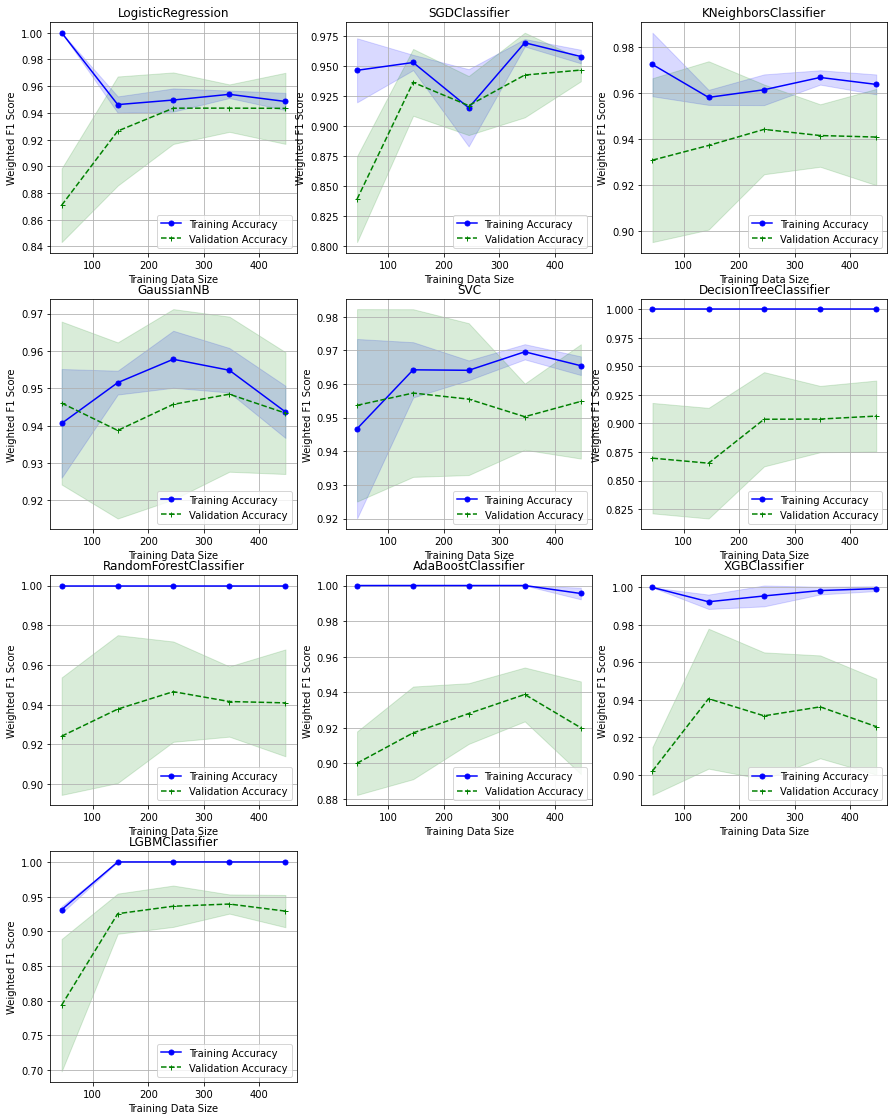

In [32]:
# Machine Learning Model Build
classifier_model = [LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100),
                    SGDClassifier(random_state=42),
                    KNeighborsClassifier(),
                    GaussianNB(),
                    SVC(random_state=42),
                    DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42), 
                    AdaBoostClassifier(random_state=42), 
                    XGBClassifier(objective="binary:logistic", random_state=42, eval_metric='mlogloss', use_label_encoder=False),
                    LGBMClassifier(random_state=42)
                   ]

# Call Classification module
class_perf_df, learning_curve_df, class_report_df = build_class_model(X_train, X_test, y_train, y_test, classifier_model)

print('Training Details - ')
display(class_perf_df)
print('Learning Curves - ')
create_learning_curve(learning_curve_df)

## CLASSIFICATION MATRIX

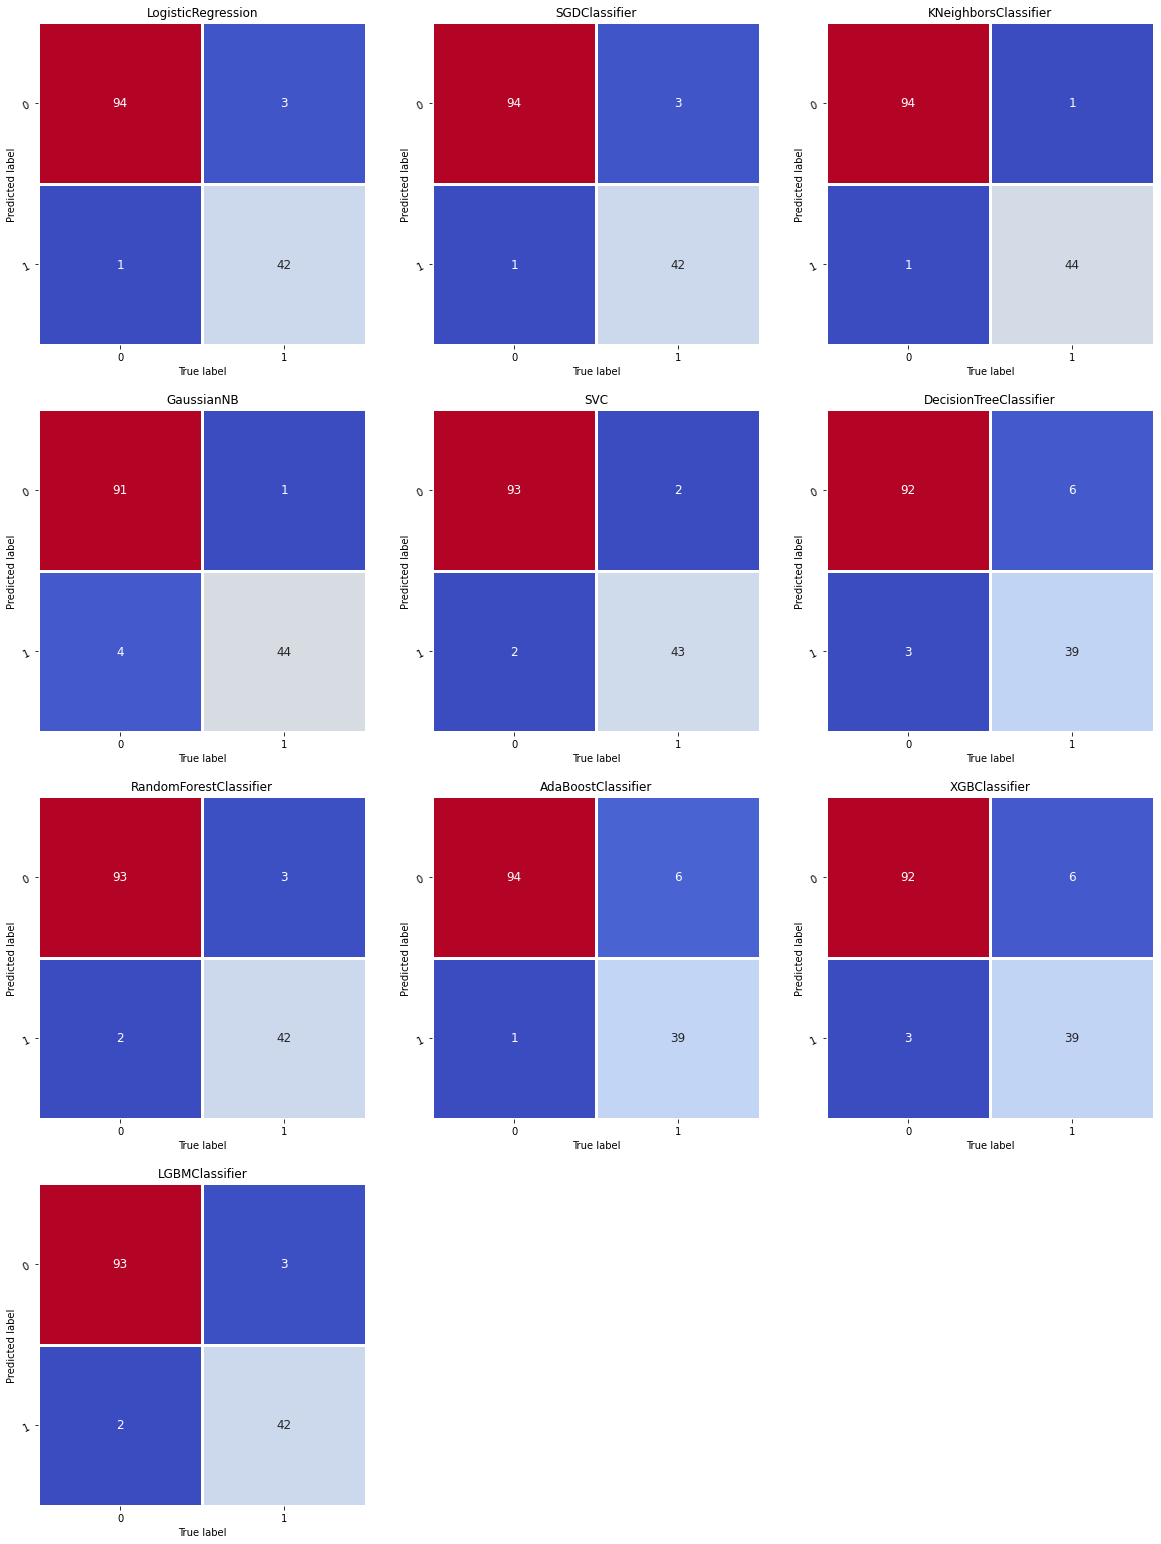

In [33]:
# Show Confusion Matrix
plt.figure(figsize=(20, 70))
view_confusion_matrix(class_perf_df, columns=3)

## CLASSIFICATION REPORT

In [34]:
# Show Classfication Report
class_report_df
for clf in range(class_report_df.shape[0]):
    print('\n', class_report_df['Classifier'].iloc[clf])
    report = class_report_df['Report'].iloc[clf]
    df = pd.DataFrame(report).transpose()
    print(df)


 LogisticRegression
              precision    recall  f1-score     support
0              0.969072  0.989474  0.979167   95.000000
1              0.976744  0.933333  0.954545   45.000000
accuracy       0.971429  0.971429  0.971429    0.971429
macro avg      0.972908  0.961404  0.966856  140.000000
weighted avg   0.971538  0.971429  0.971253  140.000000

 SGDClassifier
              precision    recall  f1-score     support
0              0.969072  0.989474  0.979167   95.000000
1              0.976744  0.933333  0.954545   45.000000
accuracy       0.971429  0.971429  0.971429    0.971429
macro avg      0.972908  0.961404  0.966856  140.000000
weighted avg   0.971538  0.971429  0.971253  140.000000

 KNeighborsClassifier
              precision    recall  f1-score     support
0              0.989474  0.989474  0.989474   95.000000
1              0.977778  0.977778  0.977778   45.000000
accuracy       0.985714  0.985714  0.985714    0.985714
macro avg      0.983626  0.983626  0.983626 

## GRID SEARCH - Logistic Regression

## GRID SEARCH - K Nearest Neighbours

## GRID SEARCH - SVM

## GRID SEARCH - Naive Bayes

## GRID SEARCH - Decision Tree

## GRID SEARCH - Random Forest